### Libraires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Utils as utils
import seaborn as sns
import warnings
import config as cnf
from sklearn.preprocessing import OrdinalEncoder

c:\Users\HAMZA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


### WARNINGS AND DISPLAY

In [3]:
# For output settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 700)

# For warnings
warnings.filterwarnings("ignore")

## LOAD DATASET

In [4]:
train_df = pd.read_parquet(cnf.trainpath)
test_df = pd.read_parquet(cnf.testpath)

## INFO ABOUT DATASET
info_dataset.txt

In [5]:
utils.check_df(train_df)

##################### Shape #####################
(94049, 58)
##################### Types #####################
id              object
month            int64
n_seconds_1    float64
n_seconds_2    float64
n_seconds_3    float64
carrier         object
devicebrand     object
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
feature_30     float64
feature_31    

## TARGET SEPERATED

In [6]:
train_df = utils.do_Target_spareted(train_df)

## OBTAINING CATEGORICAL AND NUMERICAL VARIABLES

In [7]:
cat_cols, num_cols,cat_but_car = utils.grab_col_names(train_df,p=True)

Observations: 94049
Variables: 60
cat_cols: 4
num_cols: 53
cat_but_car: 3
num_but_cat: 1


### SOME REGULATIONS FOR devicebrand and carrier

In [8]:
for i in ['gm','GM','generalmobile']:
    train_df['devicebrand'] = train_df['devicebrand'].str.replace(i, 'GENERAL_MOBILE', regex=True)
train_df['devicebrand'] = train_df['devicebrand'].str.replace('Reeder', 'reeder', regex=True)
train_df['devicebrand'] = train_df['devicebrand'].str.replace('Casper', 'CASPER', regex=True)
train_df['devicebrand'] = train_df['devicebrand'].str.replace('Realme', 'realme', regex=True)
train_df['devicebrand'] = train_df['devicebrand'].str.replace('htc', 'HTC', regex=True)
train_df['devicebrand'] = train_df['devicebrand'].str.replace('HikING', 'HIKING', regex=True)
train_df['devicebrand'] = train_df['devicebrand'].str.replace('Huawei', 'HUAWEI', regex=True)
train_df['devicebrand'] = train_df['devicebrand'].str.replace('Meizu', 'meizu', regex=True)
    
    
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'VODAFONE' if 'VODAFONE' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'VODAFONE' if 'VF' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURKCELL' if 'LIFECELL' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURK_TELEKOM' if 'TURK TELEKO' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURK_TELEKOM' if 'TÜRK TELEKO' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURK_TELEKOM' if 'TURKTELEKOM' in x else x)
train_df['carrier'] = train_df['carrier'].str.replace('^KCELL ', 'AKCELL', regex=True)
train_df['carrier'] = train_df['carrier'].str.replace('^中国', 'CHINATEL', regex=True)
train_df['carrier'] = train_df['carrier'].str.replace('ドコモ', 'JAPENTEL', regex=True)  
train_df['carrier'] = train_df['carrier'].str.replace('^Z 4.5G+', 'ZAIN', regex=True)  


yurtdisi = ['ALMADAR','AIRTEL','AZERCELL','BAKCELL','O2','BEE','A1 ','3_AT','IRANCELL',
                'AYYILDIZ','BH','NL','ORANGE','MOLDCELL','ZAIN','YETTEL','VERIZONE','TELEKOM',
                'TELENOR','TELE2','TELIA','MAGTI','STC','BOUYGUES','HORMUUD','JIO','LIDL','KSA',
                'FREEDOM','BUDGET','XFINITY','CHINA_TELECOM','MTN','1&1','BASE','CLARO','GEOCELL',
                'MEGAFONE','GSMOBILE','ETISALAT','TIM','MAXIS','PROXIMUS', 'SUNRISE', 'WINDTRE', 
                'VODACOM', 'LYCAMOBILE','LIBYANA','TIGO', 'ASIACELL', 'SFR','CUBACELL','AKCELL',
                'SALT','T-MOBILE', 'CHINATEL', 'JAPENTEL','ROBI','AWCC','KYIVSTAR','GLOBE','TDC',
                'DIGICEL','DIGITEL','DIGITEC','VOLNA','HANDYVERTRAG',] 
sirket = ['TURKCELL','BIMCELL','AVEA','VODAFONE','TURK_TELEKOM','TEKNOSA','PTTCELL','KKTCELL','PRIMETEL']
    
birlesim = yurtdisi+sirket
    
for anahtarKelime in birlesim:
    train_df['carrier'] = train_df['carrier'].apply(lambda x: anahtarKelime if anahtarKelime in x else x)
    
for anahtarKelime in ['HAYAT','FENER','TRABZON','61','UNKNOWN',' ','nknown']:  
    train_df['carrier'] = train_df['carrier'].apply(lambda x: 'UNKNOWN' if anahtarKelime in x else x)
    
unknown = [row for row in train_df['carrier'].unique() if row not in birlesim]
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'UNKNOWN' if x in unknown else x if x not in unknown else x)

## VISUALIZE DATA

### BOXPLOT

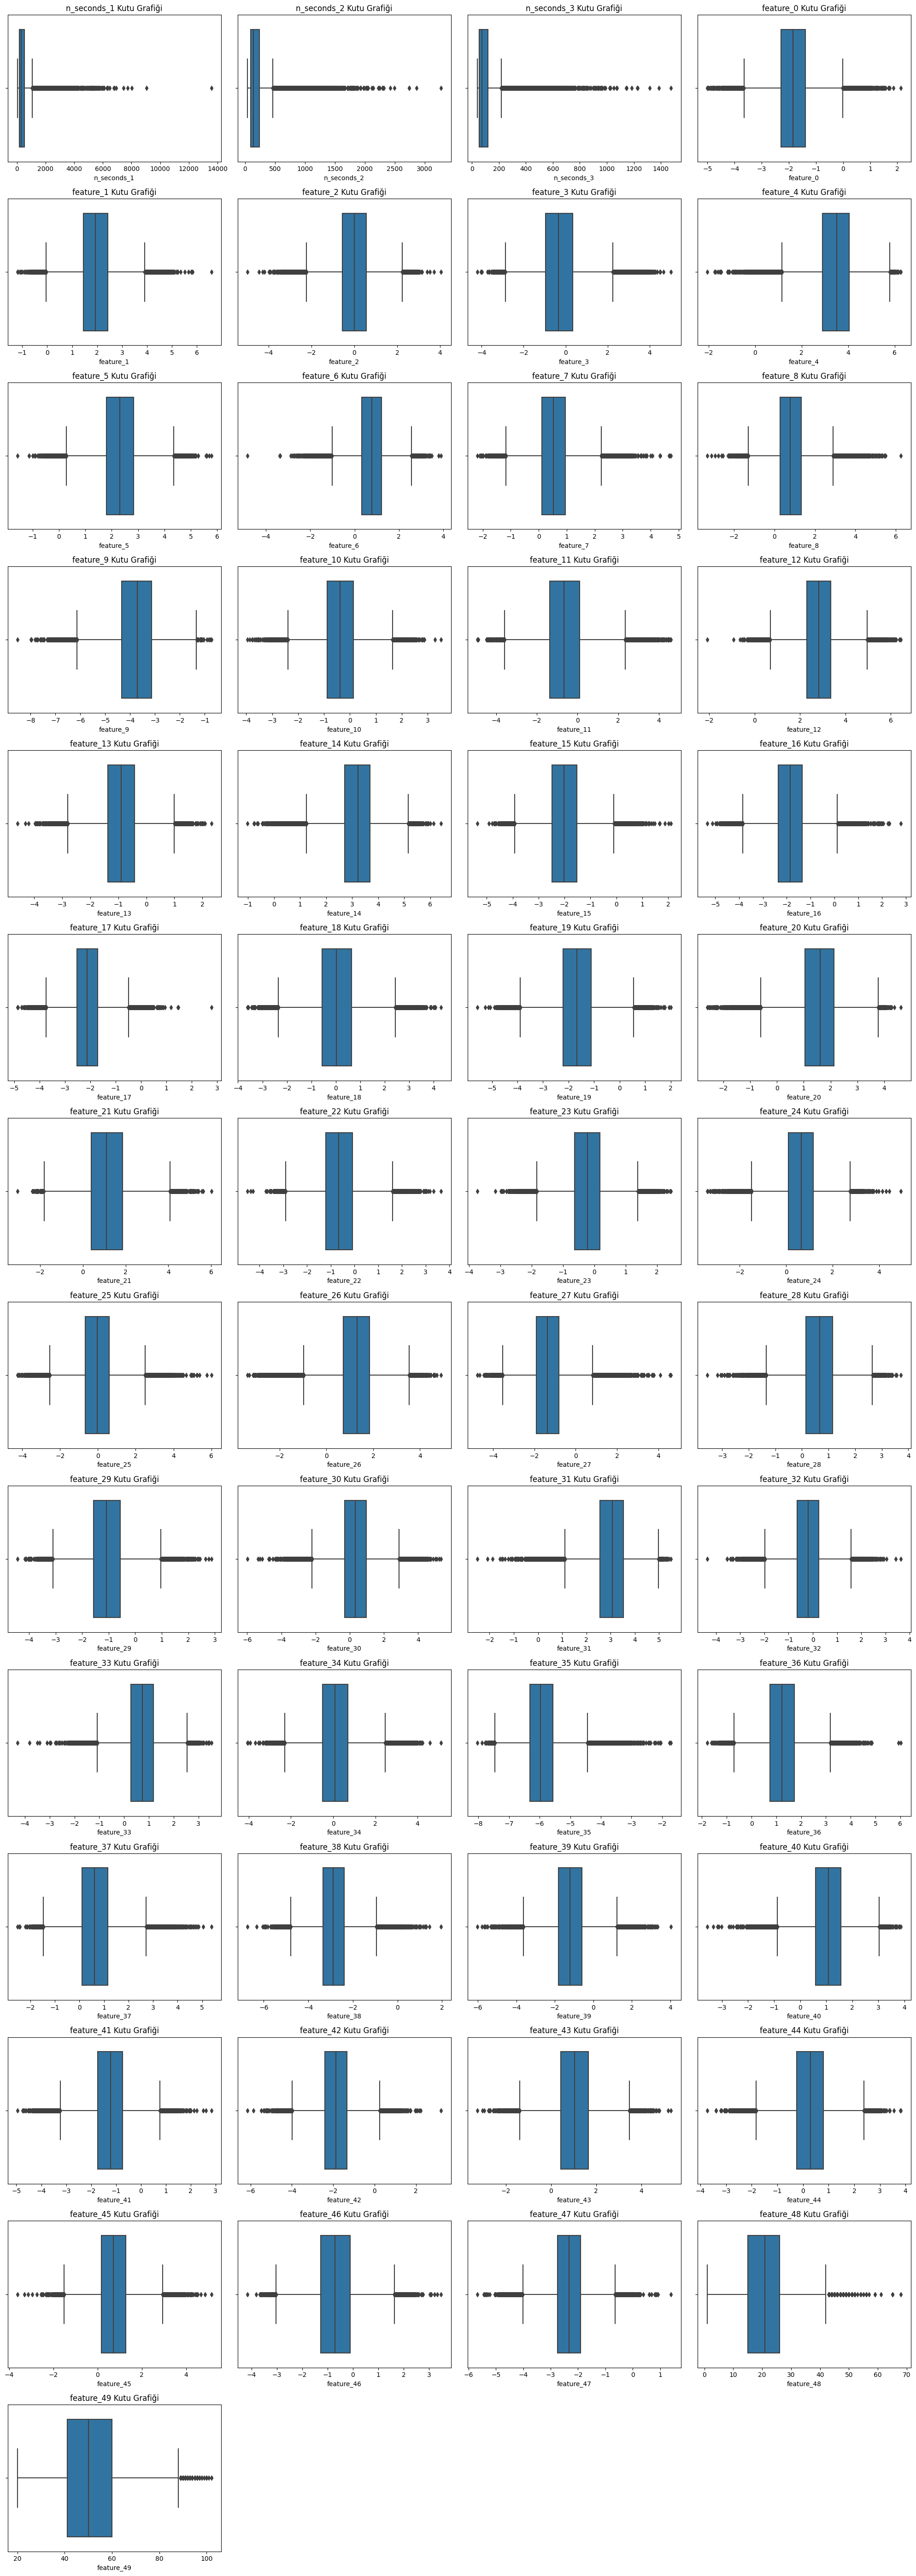

In [9]:
n_cols = 4  # 4 columns in the grid
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

for i, column in enumerate(num_cols):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=train_df[column], ax=axs[row, col])
    axs[row, col].set_title(f'{column} Kutu Grafiği')

# Removing empty subplots (if any)
for i in range(len(num_cols), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

### PIE

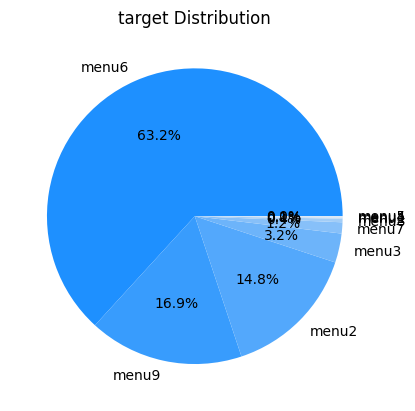

In [10]:
utils.plot_distributions(train_df,'first_menu', target_pie=True)

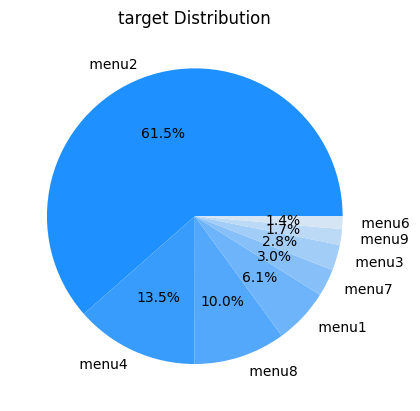

In [11]:
utils.plot_distributions(train_df,'second_menu', target_pie=True)

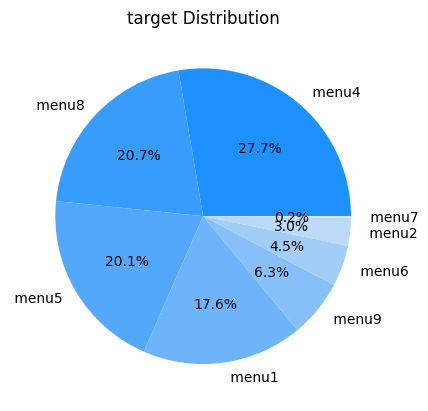

In [12]:
utils.plot_distributions(train_df,'third_menu', target_pie=True)

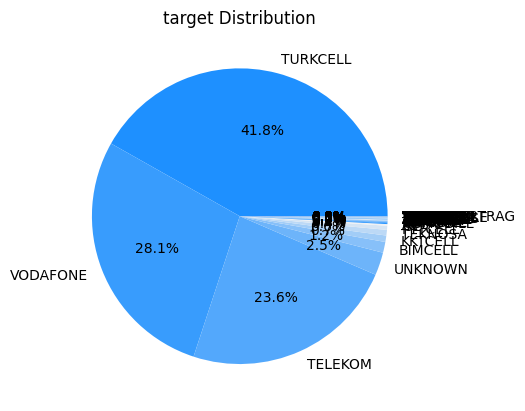

In [13]:
utils.plot_distributions(train_df,'carrier', target_pie=True)

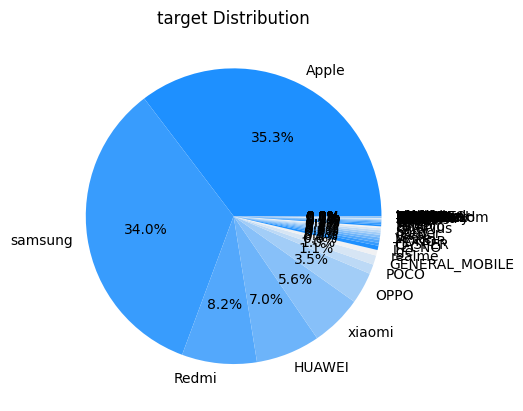

In [14]:
utils.plot_distributions(train_df,'devicebrand', target_pie=True)

### HISTOGRAM

count    94049.000000
mean       432.781818
std        429.834018
min         41.850000
5%          93.406600
10%        117.600000
20%        160.290000
30%        203.201400
40%        250.599800
50%        306.947000
60%        379.997800
70%        479.844800
80%        599.748600
90%        853.890800
95%       1165.144600
99%       2150.449200
max      13567.046000
Name: n_seconds_1, dtype: float64


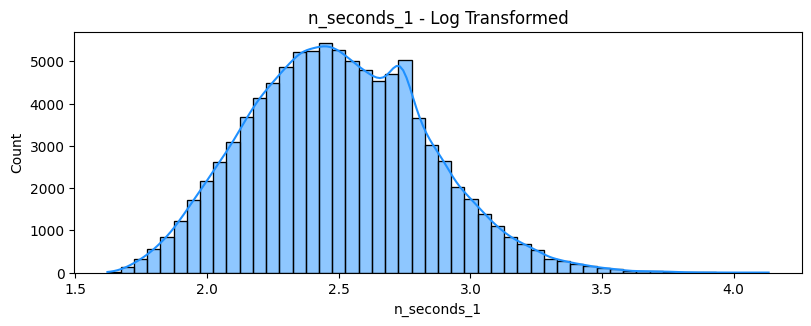

count    94049.000000
mean       197.904016
std        169.474603
min         40.231000
5%          56.843400
10%         66.344600
20%         83.229800
30%        101.002200
40%        120.972200
50%        144.874000
60%        174.551400
70%        214.698000
80%        274.679200
90%        393.363800
95%        525.943800
99%        845.388320
max       3275.128000
Name: n_seconds_2, dtype: float64


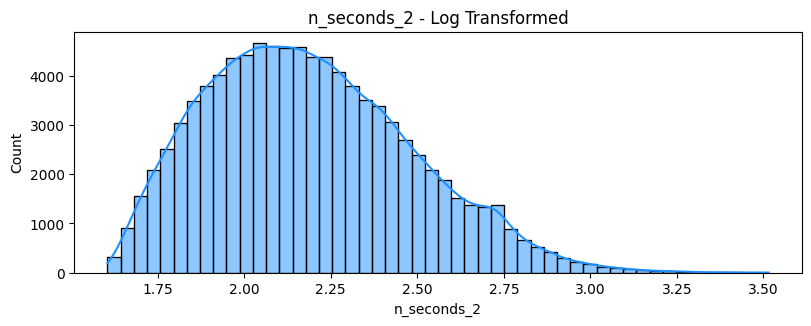

count    94049.000000
mean       102.381759
std         80.533643
min         40.001000
5%          42.399000
10%         44.932000
20%         50.559000
30%         57.267000
40%         65.205200
50%         75.415000
60%         88.440000
70%        106.949000
80%        134.906200
90%        189.913400
95%        252.950000
99%        440.111360
max       1476.077000
Name: n_seconds_3, dtype: float64


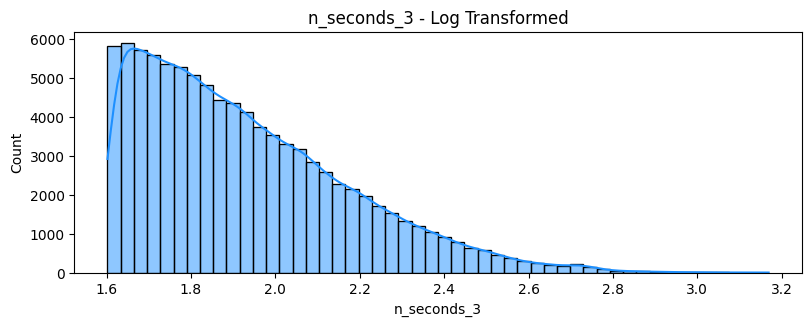

In [15]:
utils.plot_distributions(train_df, ['n_seconds_1','n_seconds_2','n_seconds_3'], kde=True, log_transform=True, alert=False)

            first_menu      Ratio
first_menu                       
menu6            59439  63.200034
menu9            15906  16.912461
menu2            13943  14.825251
menu3             2996   3.185573
menu7             1146   1.218514
menu8              367   0.390222
menu1              111   0.118024
menu4              105   0.111644
menu5               36   0.038278
##########################################


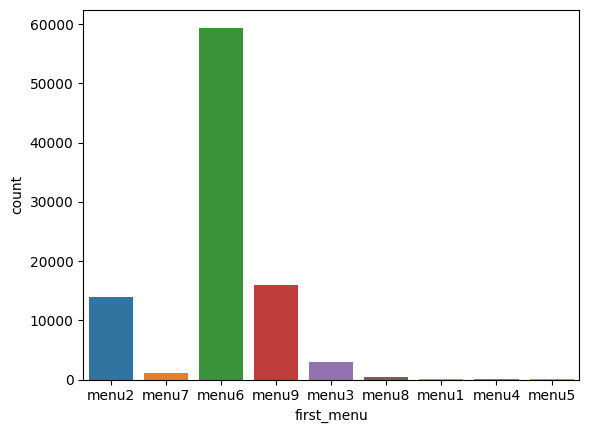

             second_menu      Ratio
second_menu                        
 menu2             57833  61.492414
 menu4             12684  13.486587
 menu8              9429  10.025625
 menu1              5704   6.064924
 menu7              2809   2.986741
 menu3              2653   2.820870
 menu9              1615   1.717190
 menu6              1322   1.405650
##########################################


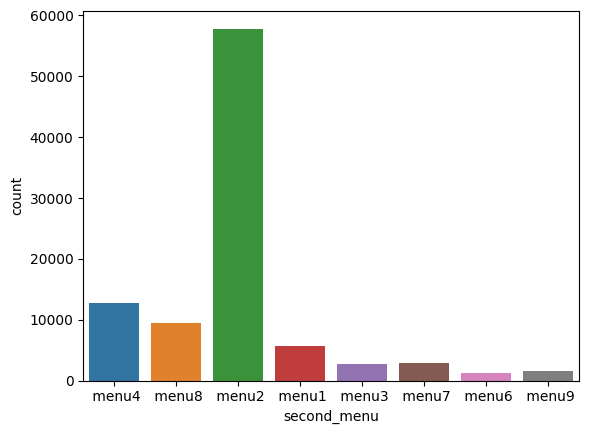

            third_menu      Ratio
third_menu                       
 menu4           26029  27.675999
 menu8           19460  20.691342
 menu5           18868  20.061883
 menu1           16538  17.584451
 menu9            5905   6.278642
 menu6            4236   4.504035
 menu2            2836   3.015449
 menu7             177   0.188200
##########################################


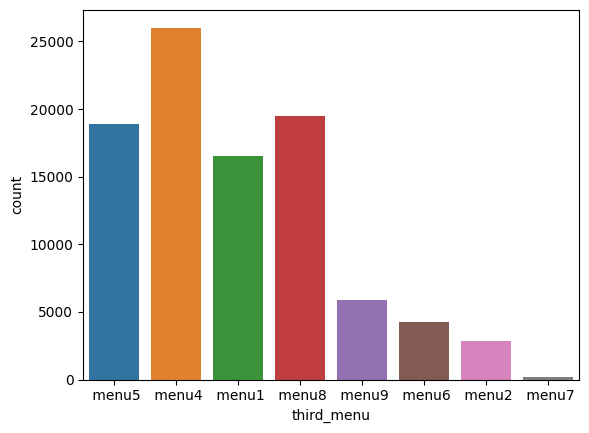

       month      Ratio
month                  
12     44433  47.244521
11     34485  36.667057
10     15131  16.088422
##########################################


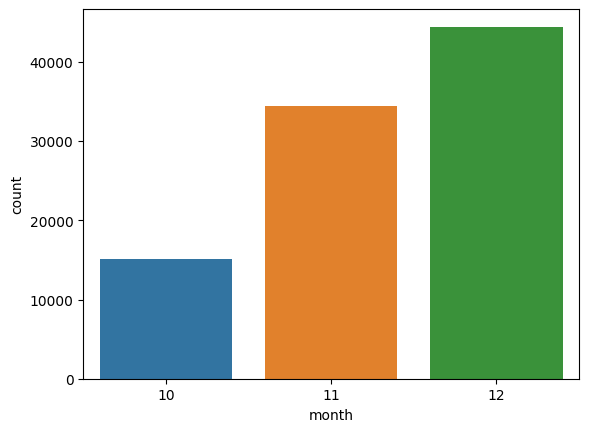

In [16]:
for cat_col in cat_cols:
    if cat_col=='target':
        continue
    utils.cat_summary(train_df,cat_col,plot=True,info=True)

In [ ]:
for num_col in num_cols:
    utils.num_summary(train_df, num_col,plot=True)

## PIVOT TABLE

In [18]:
train_df.describe(include='object').T

,count,unique,top,freq
id,94049,80478,60f93207a330776bbe5bd4fb2,3
carrier,94049,69,TURKCELL,39333
devicebrand,94049,56,Apple,33238
first_menu,94049,9,menu6,59439
second_menu,94049,8,menu2,57833
third_menu,94049,8,menu4,26029


## GROUP BY FOR FEATURE EXTRACTION

In [19]:
train_df.groupby('first_menu')['n_seconds_1'].mean()

first_menu
menu1    316.009387
menu2    493.134845
menu3    418.947496
menu4    341.351390
menu5    231.593111
menu6    430.725137
menu7    410.893435
menu8    425.093297
menu9    393.796716
Name: n_seconds_1, dtype: float64